# **Customer Churn Prediction (Kaggle - Telco Customer Churn Dataset)**

## Step 1: Data Loading and Initial Exploration

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
df = pd.read_csv('CustomerChurnDataset.csv')

In [31]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.shape

(7043, 21)

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 2: Data Cleaning

#### 2.1 Fix Data Types

In [35]:
# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

#### 2.2 Handle Missing Values

In [36]:
#checking NaN values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
#Handling missing values by replacing Mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

#### 2.3 Remove Irrelevant Columns

In [38]:
#customerID column doesn't add any value to the prediction model, so drop it.
df.drop(['customerID'], axis=1, inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Step 3: Exploratory Data Analysis (EDA)

#### 3.1 Visualize Categorical Variables

Churn rates by different features

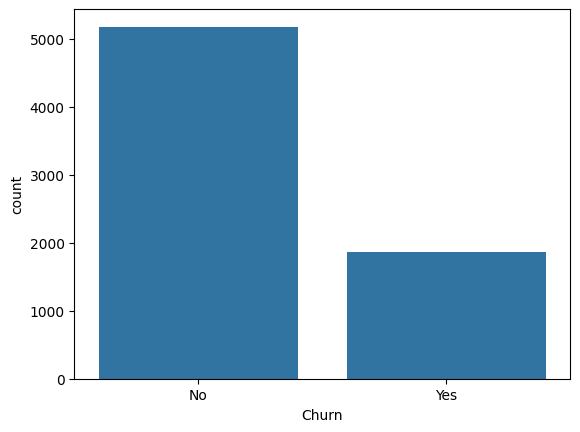

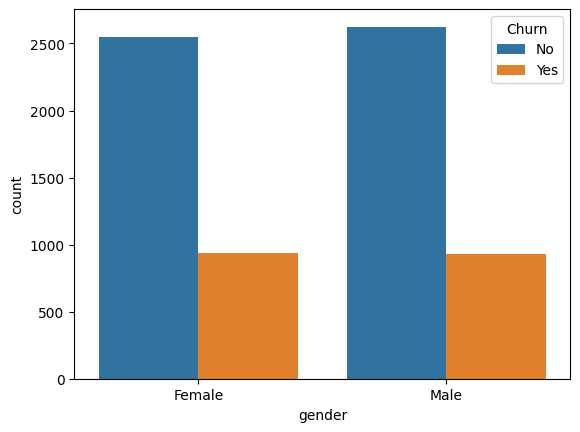

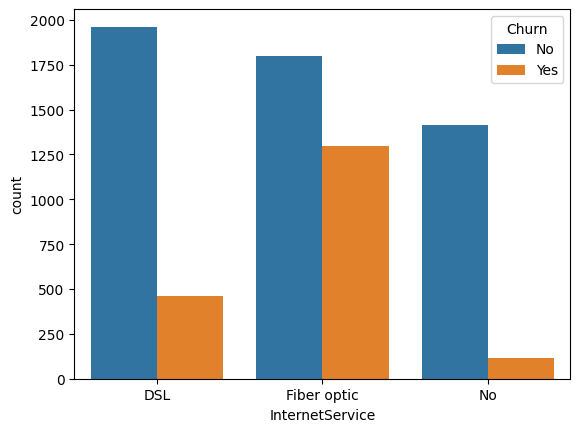

In [39]:
# Plot the churn distribution
sns.countplot(x='Churn', data=df)
plt.show()

# Plot churn by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

# Plot churn by InternetService
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.show()

#### 3.2 Visualize Numerical Variables

Visualize the distribution of MonthlyCharges and TotalCharges.

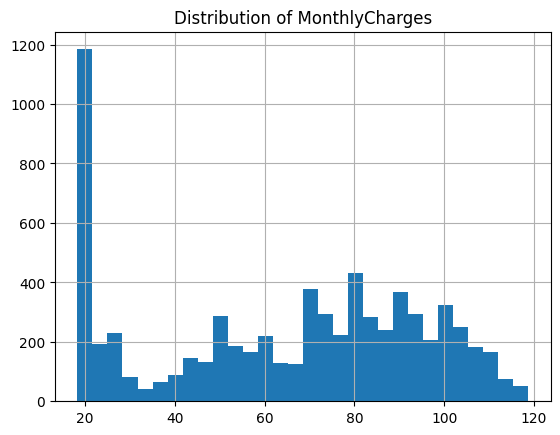

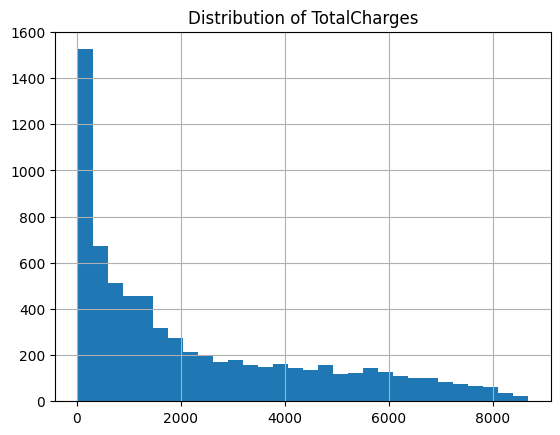

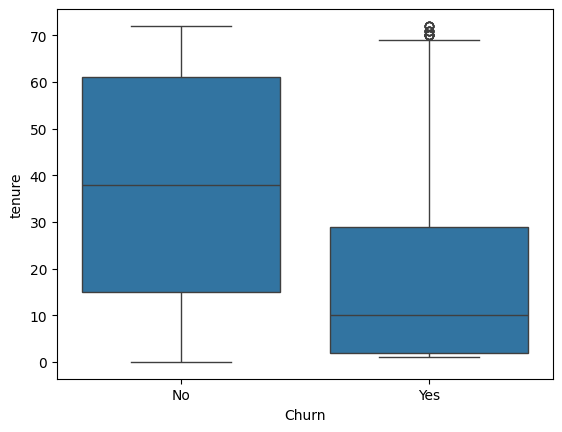

In [40]:
# Histogram for MonthlyCharges
df['MonthlyCharges'].hist(bins=30)
plt.title('Distribution of MonthlyCharges')
plt.show()

# Histogram for TotalCharges
df['TotalCharges'].hist(bins=30)
plt.title('Distribution of TotalCharges')
plt.show()

# Boxplot for tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


## Step 4: Data Preprocessing

#### 4.1 Encode Categorical Variables

In [41]:
# Convert binary categorical columns into 0 and 1
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 
                                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                 'StreamingTV', 'StreamingMovies', 'PhoneService', 'PaperlessBilling', 
                                 'Partner', 'Dependents'], drop_first=True)


In [42]:
df.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_Yes,PaperlessBilling_Yes,Partner_Yes,Dependents_Yes
0,1,0,1,29.85,29.85,0,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,0,34,56.95,1889.50,0,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,2,53.85,108.15,1,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3,0,0,45,42.30,1840.75,0,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,1,0,2,70.70,151.65,1,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False


#### 4.2 Feature Scaling

In [43]:
# Select numerical columns for scaling
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

Saving Cleaned Dataset

In [45]:
# Save the processed dataset to a CSV file
df.to_csv('processed_data.csv', index=False)

## Step 5: Splitting the Dataset

In [16]:
# Split the data into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Step 6: Model Building

#### 6.1 Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8218594748048261
[[934 102]
 [149 224]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



#### 6.2 Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

#Initialize the model
rf =  RandomForestClassifier(random_state=42)

#Train the model
rf.fit(X_train, y_train)

#Make Predictions
y_pred_rf = rf.predict(X_test)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7899219304471257
[[939  97]
 [199 174]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



#### 6.3 K-Nearest Neighbors (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the model
knn = KNeighborsClassifier()

#Train the model
knn.fit(X_train, y_train)

#Make Predictions
y_pred_knn = knn.predict(X_test)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.7735982966643009
[[894 142]
 [177 196]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1036
           1       0.58      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



## Step 7: Model Evaluation and Comparison

In [20]:
#comparing accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

Logistic Regression Accuracy: 0.8218594748048261
Random Forest Accuracy: 0.7899219304471257
KNN Accuracy: 0.7735982966643009


AUC Score: 0.86209203266844


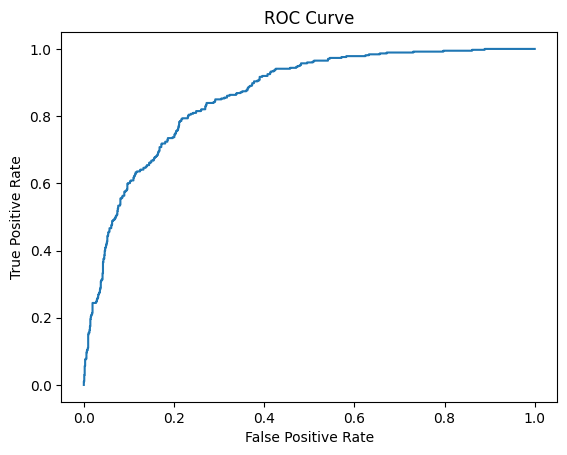

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get the predicted probabilities for the positive class
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


#### Feature Importance Analysis

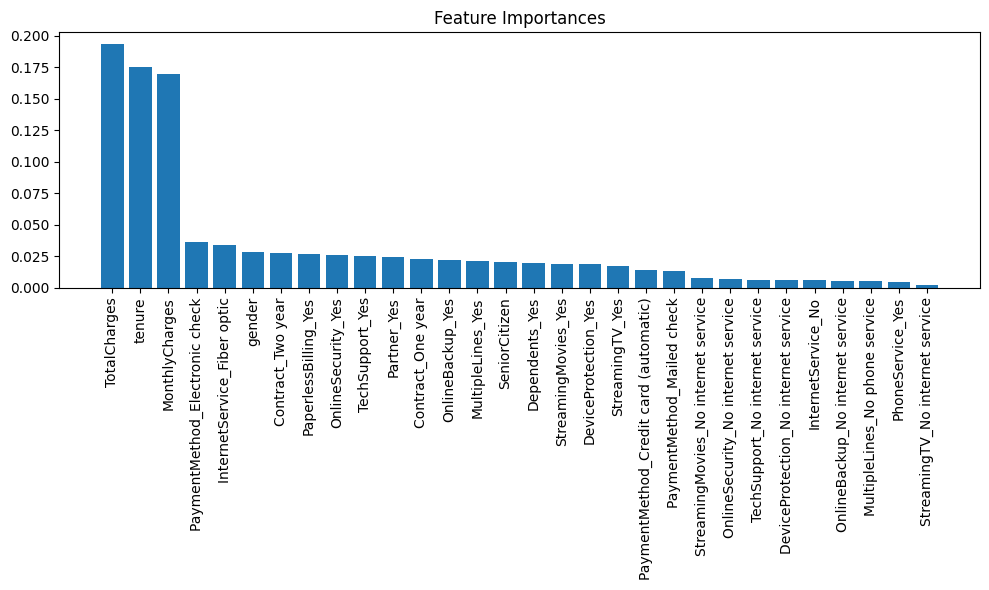

In [22]:
importances = rf.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


# **Step 8:    Dashboard**

https://customerchurnanalysis.netlify.app/